<a href="https://colab.research.google.com/github/priyanshgupta1998/All_codes/blob/master/intursion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Preliminaries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import urllib
import csv

In [0]:
from sklearn import datasets, preprocessing, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, tree
from sklearn.decomposition import PCA

In [0]:
names=['Duration', 'protocol_type', 'Service', 'Flag', 'src_bytes', 'dst_bytes', 'Land', 'wrong_fragment', 'Urgent', 'Hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'Count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','Class']

#Train File

In [105]:
train_multiclass = pd.read_csv('/home/kddcup.data_10_percent_corrected.csv', quotechar=',', skipinitialspace=True , names=names)
l = len(train_multiclass)
print(train_multiclass.shape)
train_multiclass['Class'].unique()

(494021, 42)


array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

ADD TWO CSV FILE TRAIN + TEST

In [0]:
with open('/home/test.csv','r') as readFile:
    reader = csv.reader(readFile)
    lines = list(reader)
lines.insert(0,'')
with open('/home/kddcup.data_10_percent_corrected.csv','a') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)
readFile.close()
writeFile.close()

In [118]:
len(train_multiclass)

494050

In [0]:
train_multiclass.loc[(train_multiclass['Class'] =='smurf.')|(train_multiclass['Class'] =='neptune.') | (train_multiclass['Class'] =='back.') | (train_multiclass['Class'] =='teardrop.') |(train_multiclass['Class'] =='pod.')| (train_multiclass['Class']=='land.'),'Class'] = 'DOS_ATTACK'

In [0]:
train_multiclass.loc[(train_multiclass['Class'] =='satan.')|(train_multiclass['Class'] =='ipsweep.') | (train_multiclass['Class'] =='portsweep.') | (train_multiclass['Class'] =='nmap.'),'Class'] = 'probe'

In [0]:
train_multiclass.loc[(train_multiclass['Class'] =='spy.')|(train_multiclass['Class'] =='phf.')|(train_multiclass['Class'] =='multihop.')|(train_multiclass['Class'] =='ftp_write.') | (train_multiclass['Class'] =='imap.') | (train_multiclass['Class'] =='warezmaster.') |(train_multiclass['Class'] =='guess_passwd.')| (train_multiclass['Class']=='warezclient.'),'Class'] = 'r2l'

In [0]:
train_multiclass.loc[(train_multiclass['Class'] =='buffer_overflow.')|(train_multiclass['Class'] =='rootkit.') | (train_multiclass['Class'] =='loadmodule.') | (train_multiclass['Class'] =='perl.'),'Class']='u2r'

In [0]:
train_multiclass.loc[(train_multiclass['Class'] =='normal.'),'Class'] = 'normal'

In [134]:
attr_encoder = feature_extraction.DictVectorizer(sparse=False)
attr_encoder

DictVectorizer(dtype=<type 'numpy.float64'>, separator='=', sort=True,
        sparse=False)

In [136]:
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [137]:
train_data_df_m = attr_encoder.fit_transform(train_multiclass.iloc[:,:-1].T.to_dict().values())
np.shape(train_data_df_m)

(494050, 118)

In [138]:
train_target_df_m= label_encoder.fit_transform(train_multiclass.iloc[:,-1])  #prediction purose __>target_data
np.shape(train_target_df_m)

(494050,)

In [0]:
train_data_decoded_m = pd.DataFrame(train_data_df_m)
train_target_decoded_m = pd.DataFrame(train_target_df_m)

In [140]:
print(np.shape(train_data_decoded_m))
print(np.shape(train_target_decoded_m))

(494050, 118)
(494050, 1)


In [0]:
#load some modules to help
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [142]:
train_data_pca2 = PCA(n_components=29).fit_transform(train_data_decoded_m)
train_data_pca_df2 = pd.DataFrame(train_data_pca2)
np.shape(train_data_pca2)

(494050, 29)

In [0]:
#Creating our scaler and applyting it to our dataset after feature reduction
standard_scaler = preprocessing.StandardScaler()

In [144]:
train_ratio_standard_scaled_values2 = standard_scaler.fit_transform(train_data_pca_df2.values)
train_data_scaled2=pd.DataFrame(train_ratio_standard_scaled_values2)
np.shape(train_ratio_standard_scaled_values2)

(494050, 29)

In [192]:
train_multiclass['Class'].value_counts()

DOS_ATTACK    391468
normal         97280
probe           4111
r2l             1134
u2r               57
Name: Class, dtype: int64

#classsifier

In [152]:
clf = svm.SVC(kernel='linear',class_weight="balanced", max_iter=100000000)
clf.fit(train_data_scaled2[0:l], train_target_decoded_m[0][0:l])

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=100000000, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

#Prediction

In [154]:
actual = train_target_decoded_m[0][l:]
np.array(actual)

array([1, 4, 4, 4, 0, 0, 3, 0, 0, 2, 2, 0, 3, 0, 3, 2, 3, 2, 3, 3, 3, 3,
       4, 1, 4, 0, 0, 0, 0])

In [155]:
pred = clf.predict(train_data_scaled2[l:]) 
np.array(pred)

array([1, 4, 4, 4, 3, 0, 4, 0, 0, 2, 2, 0, 4, 0, 3, 2, 1, 2, 3, 3, 3, 3,
       4, 1, 4, 0, 0, 0, 0])

#accuracy

In [181]:
# how much model is trained
clf.score(train_data_scaled2[0:l], train_target_decoded_m[0][0:l])   

0.9963503575758925

In [190]:
# calculate accuracy
from sklearn import metrics
print((metrics.accuracy_score(actual, pred))*100)   # accuracy of test dataset

86.20689655172413


In [195]:
import time
for i in pred:
    if(i==0):
        print("DOS_ATTACK")
    elif(i==1):
        print("NORMAL")
    elif(i==2):
        print("PROBE_ATTACK")
    elif(i==3):
        print("R2L_ATTACK")
    else:
        print("U2R_ATTACK")

NORMAL
U2R_ATTACK
U2R_ATTACK
U2R_ATTACK
R2L_ATTACK
DOS_ATTACK
U2R_ATTACK
DOS_ATTACK
DOS_ATTACK
PROBE_ATTACK
PROBE_ATTACK
DOS_ATTACK
U2R_ATTACK
DOS_ATTACK
R2L_ATTACK
PROBE_ATTACK
NORMAL
PROBE_ATTACK
R2L_ATTACK
R2L_ATTACK
R2L_ATTACK
R2L_ATTACK
U2R_ATTACK
NORMAL
U2R_ATTACK
DOS_ATTACK
DOS_ATTACK
DOS_ATTACK
DOS_ATTACK


#visualization

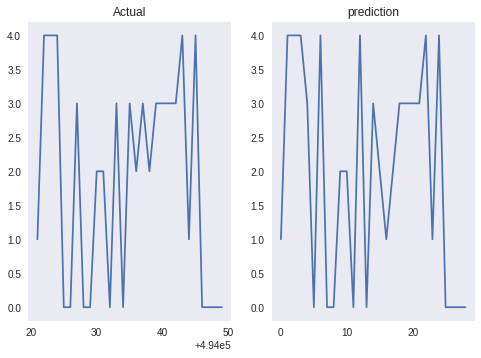

In [179]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.title('Actual')
plt.plot(actual)
plt.grid(False)



plt.subplot(122)
plt.title('prediction')
plt.plot(pred)
plt.grid(False)
plt.show()